<a href="https://colab.research.google.com/github/WonMin13/Artificial-Intelligence-Technologies/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%E2%84%965%3A%20%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F/6133_DubmanLB_lab_5_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа №5. Линейная регрессия.**

**Выполнила: 6133-010402D, Дубман Любовь Борисовна.**

Данные доступены на [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/10/automobile)

# Задание

## Задание 1. Считать в pandas.DataFrame любой источник данных:

* Блок с отступами

* CSV,

* JSON,

* Excel-файл,

* HTML-таблицу и т.п

## Задание 2. Датасет и подготовка данных, этап 1:

* Привести описание датасета.

* Осуществить предобработку данных (избавиться от null, убрать некоторые признаки и т.п.) - "подчистить данные".

* Нормализовать численные данные.

* Визуализировать heatmap-матрицу кореллированности признаков.

* Визуализировать взаимосвязь между target-переменной и каждым из признаком (с использованием srs.pairplot или pandas.plotting.scatter_matrix). Лучше всего построить диаграмму попарного распределения между таргетом и каждым из признаков отдельно (пример с sns.FacetGrid в лекции).

* Разбить выборку на обучающую и тестовую.
        Из датафреймов обучающей и тестовой выборки необходимо временно убрать категориальные признаки (исходные датафреймы сохранить для 2 этапа).

## Задание 3. Регрессия МНК:

* Обучить модель линейной регрессии LinearRegression.

* Вывести метрики MAE, MSE и R^2 на тестовом наборе.

* Вывести model.coef_ и model.intercept_.

* Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

## Задание 4. Для каждого вида регрессии (Ridge, LASSO, Elastic Net):

* С использованием GridSearchCV осуществить подбор параметров регуляризации (alpha для Ridge и LASSO, alpha и l1_ratio для Elastic Net)

* Вывести значения гиперпараметров, коэффициенты регрессии (model.coef_ и model.intercept_) и значения метрик на тестовом наборе для наилучшей модели (MAE, MSE и R^2).

* Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).
              
       Запомнить лучшие модели для 2 этапа.

## Задание 5. Датасет и подготовка данных, этап 2:

* Использовать датафреймы после разбиения на обучающую и тестовую выборки из 1 этапа с категориальными признаками.

* Закодировать категориальные признаки в обучающей и тестовой выборках.

## Задание 6. Регрессии, этап 2:

* Обучить LinearRegression, лучшие модели Ridge, LASSO, Elastic Net на обучающем наборе с категориальными признаками.

* Вывести значения гиперпараметров, коэффициенты регрессии (model.coef_ и model.intercept_) и значения метрик на тестовом наборе (MAE, MSE и R^2).

* Сравнить метрики с наличием категориальных признаков и без для каждой из моделей.

* Выбрать лучшую модель.

* Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

* Осуществить фильтрацию признаков с использованием Recursive Feature Elimination.

* Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

* Вывести значения метрик на тестовом наборе (MAE, MSE и R^2).

## Задание 7. Сделать вывод:

* Лучший регрессор, обученный на данных без категориальных признаков (значения метрик на тестовом наборе).

* Лучший регрессор, обученный на данных с категориальными признаками (значения метрик на тестовом наборе).

* Вывод о результатах использования Recursive Feature Elimination (лучше или хуже - значения метрик).

# Выполнение лабораторной работы

## Задание 1.

### Подключаем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
from sklearn.feature_selection import RFE

### Подключение Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Считывание датасета

In [3]:
df = pd.read_csv("/content/drive/MyDrive/datasets/imports-85.txt",names=['symboling', 'normalized-losses', 'make', 'fuel-type',
                                           'aspiration', 'num-of-doors','body-style','drive-wheels',
                                           'engine-location','wheel-base','length','width','height',
                                           'curb-weight','engine-type','num-of-cylinders','engine-size',
                                           'fuel-system','bore','stroke','compression-ratio','horsepower',
                                          'peak-rpm','city-mpg','highway-mpg','price'])

## Задание 2. Датасет и подготовка данных

### Описание Dataset

In [4]:
fp = "/content/drive/MyDrive/datasets/imports-85_inf2.txt" #вытащим описание датасета
with open(fp) as file_handler:
    for line in file_handler:
        print(line)

1. Title: 1985 Auto Imports Database





2. Source Information:



   -- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)



   -- Date: 19 May 1987



   -- Sources:



     1) 1985 Model Import Car and Truck Specifications, 1985 Ward's



        Automotive Yearbook.



     2) Personal Auto Manuals, Insurance Services Office, 160 Water



        Street, New York, NY 10038 



     3) Insurance Collision Report, Insurance Institute for Highway



        Safety, Watergate 600, Washington, DC 20037





3. Past Usage:



   -- Kibler,~D., Aha,~D.~W., \& Albert,~M. (1989).  Instance-based prediction



      of real-valued attributes.  {\it Computational Intelligence}, {\it 5},



      51--57.



	 -- Predicted price of car using all numeric and Boolean attributes



	 -- Method: an instance-based learning (IBL) algorithm derived from a



	    localized k-nearest neighbor algorithm.  Compared with a



	    linear regression prediction...so all instances



	

In [5]:
# Вывод информации о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
# Вывод первых строк данных
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


### Предобработка данных

In [7]:
df.replace('?', np.nan, inplace=True)

# Функция для замены NaN на случайные значения из того же столбца
def replace_nan_with_random(df):
    for col in df.columns:
        # Получаем значения столбца без NaN
        non_nan_values = df[col].dropna().values
        # Выбираем случайное значение для каждой NaN
        df[col] = df[col].apply(lambda x: np.random.choice(non_nan_values) if pd.isna(x) else x)
    return df

# Применяем функцию к DataFrame
df = replace_nan_with_random(df)

In [8]:
#проверим бинарный признак
df["num-of-doors"].unique()

array(['two', 'four'], dtype=object)

In [9]:
# Вывод первых строк данных
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,91,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,94,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,134,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,161,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,150,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,12629


### Удаление категориальных и бинарных признаков

In [10]:
mach = df.drop(columns=['symboling','make','body-style','drive-wheels',
                            'fuel-system','engine-type',
                          'fuel-type', 'aspiration', 'num-of-doors','engine-location',
                          'num-of-cylinders'])
mach = mach.astype('float')
columns = mach.columns

In [11]:
mach

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,91.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,94.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,134.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


### Нормализовать численные данные

In [12]:
scaler = StandardScaler()
mach = scaler.fit_transform(mach)

### Визуализиция heatmap-матрицы кореллированности признаков

<Axes: >

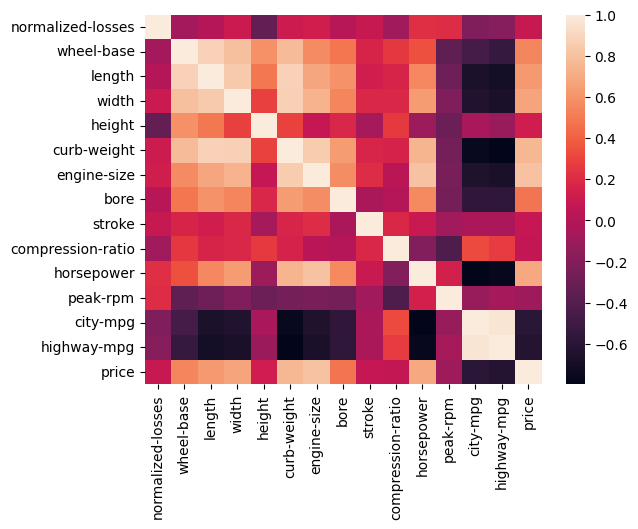

In [13]:
mach = pd.DataFrame(mach, columns=columns)
corr = mach.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

### Визуализация взаимосвязи между целевой переменной и каждым признаком

In [14]:
X = mach.drop("horsepower", axis=1)
y = mach["horsepower"]
X.columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

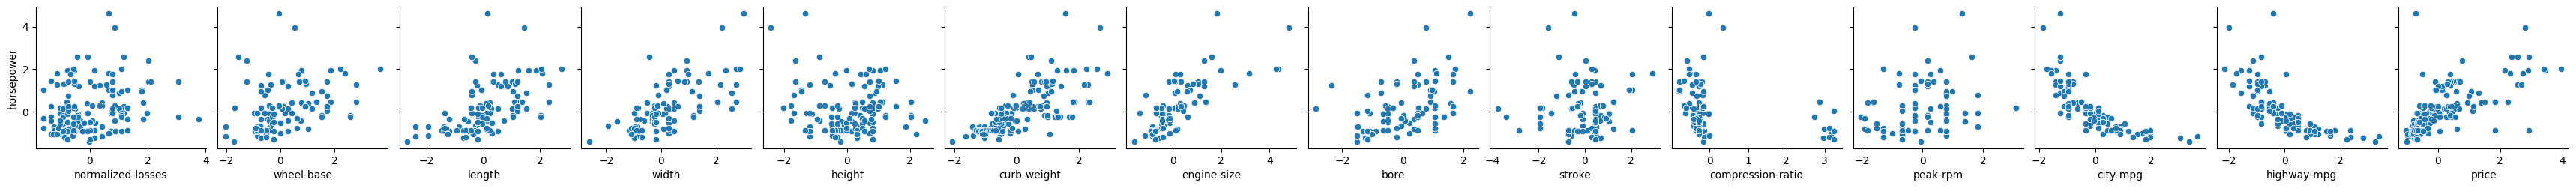

In [15]:
# Визуализация взаимосвязи между признаками и целевой переменной
sns.pairplot(data=mach, y_vars=['horsepower'], x_vars=X.columns)

### Разделение данных на выборки

In [16]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state = 0)

## Задание 3. Линейная регрессия

In [17]:
# Обучение модели линейной регрессии
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

### Вывести метрики MAE, MSE и R^2 на обущающем и тестовом наборе

In [18]:
# Вывод метрик на обучающем и тестовом наборах
print('------------train-------------')
print('|MAE: |', mae(y_train, lin_reg.predict(X_train)))
print('|MSE: |', mse(y_train, lin_reg.predict(X_train)))
print('|R2:  |', r2(y_train, lin_reg.predict(X_train)))
print('------------test--------------')
print('|MAE: |', mae(y_test, lin_reg.predict(X_test)))
print('|MSE: |', mse(y_test, lin_reg.predict(X_test)))
print('|R2:  |', r2(y_test, lin_reg.predict(X_test)))
print('------------------------------')

------------train-------------
|MAE: | 0.2334029369326575
|MSE: | 0.09721501993458559
|R2:  | 0.8949105069565875
------------test--------------
|MAE: | 0.3325128834174513
|MSE: | 0.26065148972160435
|R2:  | 0.7862450118202108
------------------------------


### Вывод model.coef_ и model.intercept_

In [19]:
# Вывод коэффициентов и их важности
print('Intercept:', lin_reg.intercept_)
print('Coef:', lin_reg.coef_)

Intercept: -0.007811968904083297
Coef: [-0.00722743 -0.19351138 -0.05616348  0.08425939 -0.03471422  0.23488883
  0.44305449  0.04290819 -0.02004373 -0.025069    0.18442597 -0.50522634
  0.20948012  0.1050539 ]


### Построение графика (barh) с важностью коэфициентов при соответствующих признаках

Text(0, 0.5, 'feature')

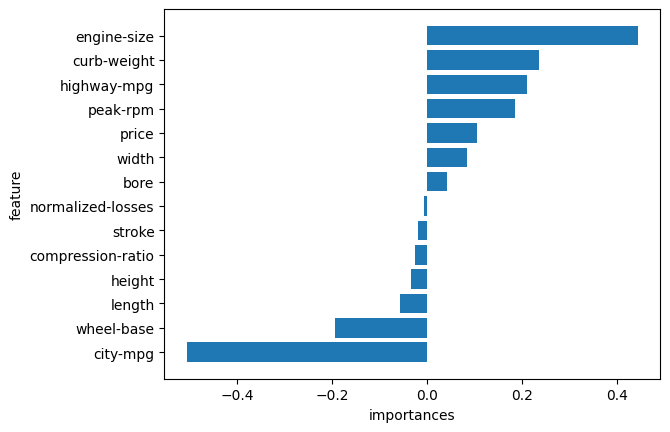

In [20]:
importances = pd.DataFrame(lin_reg.coef_,
                           index=X.columns,
                           columns=['importance']).sort_values('importance', ascending=False)
importances = importances.sort_values('importance', ascending=True)
plt.barh(range(len(X.columns)), importances['importance'])
plt.yticks(range(len(X.columns)), importances.index)
plt.xlabel("importances")
plt.ylabel("feature")

## Задание 4. Для каждого вида регрессии (Ridge, LASSO, Elastic Net):

### Модель Lasso

In [21]:
# Обучение модели Lasso с использованием GridSearchCV для подбора параметра alpha
lasso = Lasso()
parameters = {'alpha': np.linspace(0, 1, 100)}
lasso_grid = GridSearchCV(lasso, parameters, n_jobs=-1)
lasso_grid.fit(X_train, y_train)
lasso = lasso_grid.best_estimator_ # Сохранение лучшего регрессора
lasso_best_params = lasso_grid.best_params_

**Для наилучшей модели вывод метрик на обучающем и тестовом наборах**

In [22]:
# Вывод метрик на обучающем и тестовом наборах
print('--------------train-----------')
print('|MAE: |', mae(y_train, lasso.predict(X_train)))
print('|MSE: |', mse(y_train, lasso.predict(X_train)))
print('|R2:  |', r2(y_train, lasso.predict(X_train)))
print('---------------test-----------')
print('|MAE: |', mae(y_test, lasso.predict(X_test)))
print('|MSE: |', mse(y_test, lasso.predict(X_test)))
print('|R2:  |', r2(y_test, lasso.predict(X_test)))
print('------------------------------')

--------------train-----------
|MAE: | 0.23947306068034296
|MSE: | 0.10494586329825265
|R2:  | 0.8865534607878733
---------------test-----------
|MAE: | 0.3519643451232598
|MSE: | 0.34251604037943734
|R2:  | 0.7191095579737775
------------------------------


**Вывод model.coef_ и model.intercept_**

In [23]:
# Вывод коэффициентов и их важности
print('Intercept:', lasso.intercept_)
print('Coef:', lasso.coef_)

Intercept: -0.010043995495884677
Coef: [ 0.         -0.09949495 -0.          0.         -0.04483028  0.04644778
  0.4604835   0.01664288 -0.         -0.          0.15294427 -0.38049931
 -0.          0.14452121]


**Построение графика (barh) с важностью коэфициентов при соответствующих признаках**

Text(0, 0.5, 'feature')

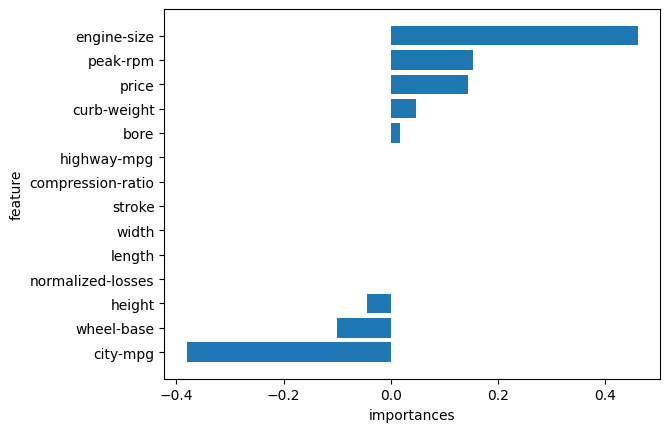

In [24]:
importances = pd.DataFrame(lasso.coef_,
                           index=X.columns,
                           columns=['importance']).sort_values('importance', ascending=False)
importances = importances.sort_values('importance', ascending=True)
plt.barh(range(len(X.columns)), importances['importance'])
plt.yticks(range(len(X.columns)), importances.index)
plt.xlabel("importances")
plt.ylabel("feature")

### Модель Ridge

In [25]:
# Обучение модели Ridge с использованием GridSearchCV для подбора параметра alpha
ridge = Ridge()
parameters = {'alpha': np.linspace(0, 1, 100)}
ridge_grid = GridSearchCV(ridge, parameters, n_jobs=-1)
ridge_grid.fit(X_train, y_train)
ridge = ridge_grid.best_estimator_ #сохранение лучшего регрессора
ridge_best_params = ridge_grid.best_params_

**Для наилучшей модели вывод метрик на обучающем и тестовом наборах**

In [26]:
# Вывод метрик на обучающем и тестовом наборах для модели Ridge
print('--------------train-----------')
print('|MAE: |', mae(y_train, ridge.predict(X_train)))
print('|MSE: |', mse(y_train, ridge.predict(X_train)))
print('|R2:  |', r2(y_train, ridge.predict(X_train)))
print('--------------test------------')
print('|MAE: |', mae(y_test, ridge.predict(X_test)))
print('|MSE: |', mse(y_test, ridge.predict(X_test)))
print('|R2:  |', r2(y_test, ridge.predict(X_test)))
print('------------------------------')


--------------train-----------
|MAE: | 0.23226364801458144
|MSE: | 0.09758226770877178
|R2:  | 0.8945135118992752
--------------test------------
|MAE: | 0.3318896106964644
|MSE: | 0.2745310979739558
|R2:  | 0.7748626272380612
------------------------------


**Вывод model.coef_ и model.intercept_**

In [27]:
# Вывод коэффициентов и их важности
print('Intercept:', ridge.intercept_)
print('Coef:', ridge.coef_)

Intercept: -0.008058238796192824
Coef: [-0.00570346 -0.20073515 -0.0364827   0.07961516 -0.03875969  0.22233924
  0.42500607  0.04463299 -0.01575868 -0.03247708  0.18035329 -0.41449006
  0.12147639  0.1253613 ]


**Построение графика (barh) с важностью коэфициентов при соответствующих признаках**

Text(0, 0.5, 'feature')

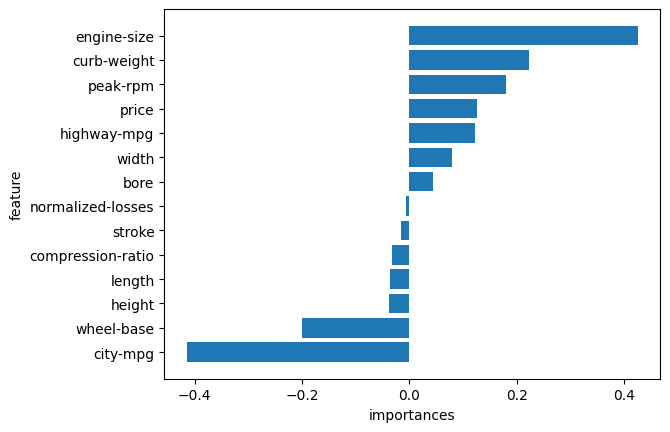

In [28]:
importances = pd.DataFrame(ridge.coef_,
                           index = X.columns,
                           columns=['importance']).sort_values('importance', ascending=False)

importances = importances.sort_values('importance', ascending=True)
plt.barh(range(len(X.columns)), importances['importance'])
plt.yticks(range(len(X.columns)), importances.index)
plt.xlabel("importances")
plt.ylabel("feature")

### Модель ElasticNet

In [29]:
# Обучение модели ElasticNet с использованием GridSearchCV для подбора параметра alpha
el_net = ElasticNet()
parameters = {'alpha': np.linspace(0, 1, 100),
              'l1_ratio': np.linspace(0, 1, 100)}

el_net_grid = GridSearchCV(el_net,parameters, n_jobs=-1)
el_net_grid.fit(X_train, y_train)
el_net = el_net_grid.best_estimator_ #сохранение лучшего регрессора
elastic_best_params = el_net_grid.best_params_

**Для наилучшей модели вывод метрик на обучающем и тестовом наборах**

In [30]:
# Вывод метрик на обучающем и тестовом наборах для модели ElasticNet

print('--------------train-----------')
print('|MAE: |', mae(y_train, el_net.predict(X_train)))
print('|MSE: |', mse(y_train, el_net.predict(X_train)))
print('|R2:  |', r2(y_train, el_net.predict(X_train)))
print('--------------test------------')
print('|MAE: |', mae(y_test, el_net.predict(X_test)))
print('|MSE: |', mse(y_test, el_net.predict(X_test)))
print('|R2:  |', r2(y_test, el_net.predict(X_test)))
print('------------------------------')

--------------train-----------
|MAE: | 0.23718837020590902
|MSE: | 0.10238270065894457
|R2:  | 0.8893242410904845
--------------test------------
|MAE: | 0.34490923846303306
|MSE: | 0.33444644218970365
|R2:  | 0.7257272714098469
------------------------------


**Вывод model.coef_ и model.intercept_**

In [31]:
# Вывод коэффициентов и их важности
print('Intercept:', el_net.intercept_)
print('Coef:', el_net.coef_)

Intercept: -0.009477325220277204
Coef: [ 0.         -0.13129942  0.          0.00985457 -0.05707691  0.14745504
  0.39175963  0.03510133 -0.         -0.03022801  0.15637757 -0.31727828
 -0.          0.17284369]


**Построение графика (barh) с важностью коэфициентов при соответствующих признаках**

Text(0, 0.5, 'feature')

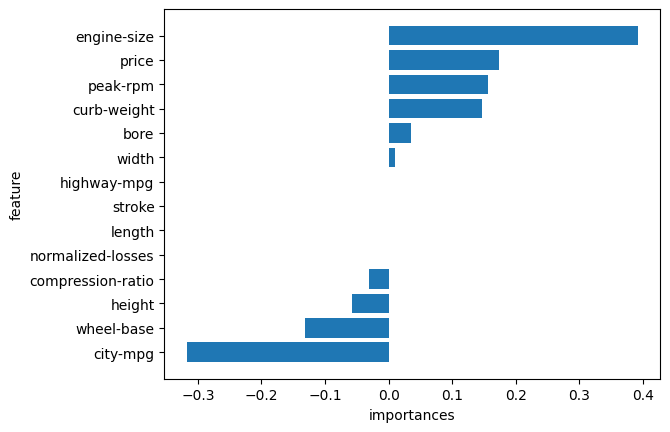

In [32]:
importances = pd.DataFrame(el_net.coef_,
                           index = X.columns,
                           columns=['importance']).sort_values('importance', ascending=False)

importances = importances.sort_values('importance', ascending=True)
plt.barh(range(len(X.columns)), importances['importance'])
plt.yticks(range(len(X.columns)), importances.index)
plt.xlabel("importances")
plt.ylabel("feature")

**Вывод всех моделей**

In [33]:
# Выывод всех трех моделей
names = {
    lin_reg: 'reg',
    lasso: 'lasso',
    ridge: 'ridge',
    el_net: 'elastic'
}
print("{:8s} | {:8s} | {:8s} | {:8s}  | {:8s} ".format('name', 'dataset', 'mae', 'mse', 'r2'))

for mod in [lin_reg, lasso, ridge, el_net]:
    print("-" * 53)
    print("{:8s} | {:8s} | {:8.5f} | {:8.5f} | {:8.5f} ".format(
        names[mod],
        'test',
        mae(y_test, mod.predict(X_test)),
        mse(y_test, mod.predict(X_test)),
        r2(y_test, mod.predict(X_test))))
    print("{:8s} | {:8s} | {:8.5f} | {:8.5f} | {:8.5f} ".format(
      names[mod],
        'train',
        mae(y_train, mod.predict(X_train)),
        mse(y_train, mod.predict(X_train)),
        r2(y_train, mod.predict(X_train))))


name     | dataset  | mae      | mse       | r2       
-----------------------------------------------------
reg      | test     |  0.33251 |  0.26065 |  0.78625 
reg      | train    |  0.23340 |  0.09722 |  0.89491 
-----------------------------------------------------
lasso    | test     |  0.35196 |  0.34252 |  0.71911 
lasso    | train    |  0.23947 |  0.10495 |  0.88655 
-----------------------------------------------------
ridge    | test     |  0.33189 |  0.27453 |  0.77486 
ridge    | train    |  0.23226 |  0.09758 |  0.89451 
-----------------------------------------------------
elastic  | test     |  0.34491 |  0.33445 |  0.72573 
elastic  | train    |  0.23719 |  0.10238 |  0.88932 


**Поиск лучшей модели (данные без категориальных признаков)**

In [34]:
# поиск лучшей модели
# Словарь для хранения моделей и их имен
models = {
    'Linear Regression': lin_reg,
    'Lasso Regression': lasso,
    'Ridge Regression': ridge,
    'ElasticNet Regression': el_net
}

# Словарь для хранения результатов метрик
results = {}

# Оценка моделей и сохранение результатов
for name, model in models.items():
    y_pred = model.predict(X_test)
    mae_val = mae(y_test, y_pred)
    mse_val = mse(y_test, y_pred)
    r2_val = r2(y_test, y_pred)
    results[name] = {'MAE': mae_val, 'MSE': mse_val, 'R2': r2_val}

# Поиск лучшей модели по минимальному значению MAE
best_model_name_mae = min(results, key=lambda x: results[x]['MAE'])
best_model_metrics_mae = results[best_model_name_mae]

# Поиск лучшей модели по минимальному значению MSE
best_model_name_mse = min(results, key=lambda x: results[x]['MSE'])
best_model_metrics_mse = results[best_model_name_mse]

# Поиск лучшей модели по максимальному значению R^2
best_model_name_r2 = max(results, key=lambda x: results[x]['R2'])
best_model_metrics_r2 = results[best_model_name_r2]

# Вывод результатов для MAE
print("Best Model (MAE):", best_model_name_mae)
print("MAE:", best_model_metrics_mae['MAE'])

# Вывод результатов для MSE
print("Best Model (MSE):", best_model_name_mse)
print("MSE:", best_model_metrics_mse['MSE'])

# Вывод результатов для R^2
print("Best Model (R2):", best_model_name_r2)
print("R2:", best_model_metrics_r2['R2'])

print("--------------------------------------------------------------------")
print("--------------------------------|-----------------------------------")
print("--------------------------------|-----------------------------------")
print("--------------------------------|-----------------------------------")
print("--------------------------------|-----------------------------------")
print("--------------------------------|-----------------------------------")
print("--------------------------------|-----------------------------------")
print("--------------------------------|-----------------------------------")
print("--------------------------------ᐁ-----------------------------------")
print("Best of the best model:", best_model_name_r2)

Best Model (MAE): Ridge Regression
MAE: 0.3318896106964644
Best Model (MSE): Linear Regression
MSE: 0.26065148972160435
Best Model (R2): Linear Regression
R2: 0.7862450118202108
--------------------------------------------------------------------
--------------------------------|-----------------------------------
--------------------------------|-----------------------------------
--------------------------------|-----------------------------------
--------------------------------|-----------------------------------
--------------------------------|-----------------------------------
--------------------------------|-----------------------------------
--------------------------------|-----------------------------------
--------------------------------ᐁ-----------------------------------
Best of the best model: Linear Regression


In [35]:
# Присвоение лучшей модели
best_model = lin_reg

**Вывод метрик для лучшей модели на тестовом наборе**

In [36]:
# Вывод метрик для лучшей модели на тестовом наборе
print('-------------test-------------')
print('|MAE: |', mae(y_test, best_model.predict(X_test)))
print('|MSE: |', mse(y_test, best_model.predict(X_test)))
print('|R2:  |', r2(y_test, best_model.predict(X_test)))
print('------------------------------')


-------------test-------------
|MAE: | 0.3325128834174513
|MSE: | 0.26065148972160435
|R2:  | 0.7862450118202108
------------------------------


**Построение графика (barh) с важностью коэфициентов при соответствующих признаках для лучшей модели**

Text(0, 0.5, 'feature')

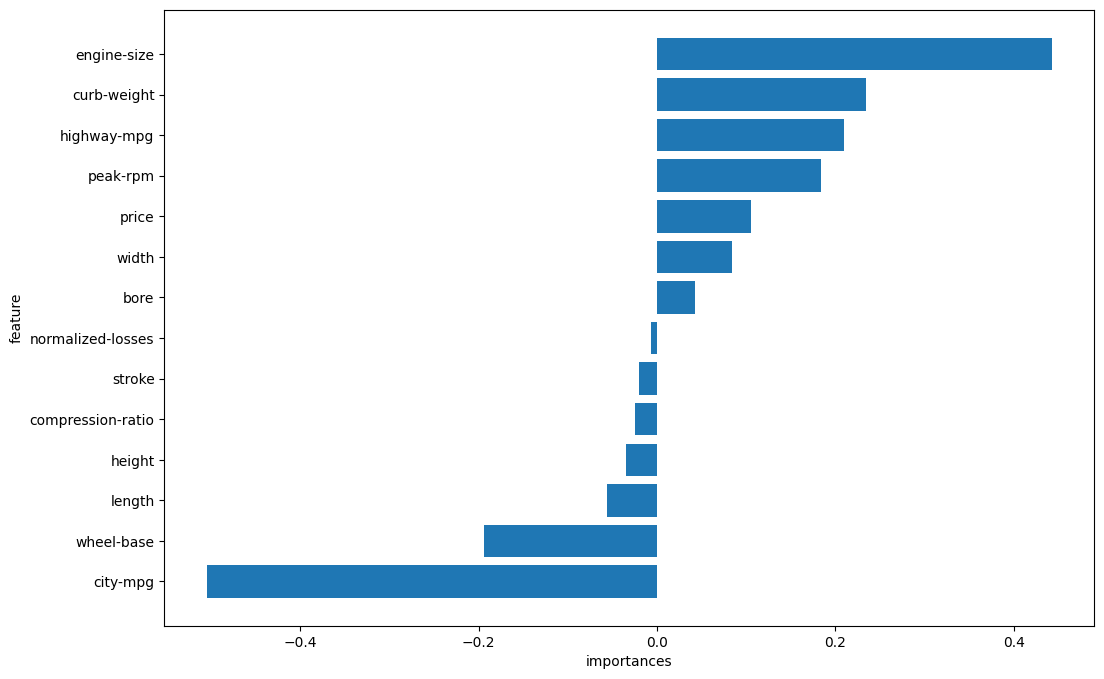

In [37]:
# Визуализация важности коэффициентов после обучения модели
plt.figure(figsize=(12, 8))
importances = pd.DataFrame(best_model.coef_,
                           index=X.columns,
                           columns=['importance']).sort_values('importance', ascending=False)
importances = importances.sort_values('importance', ascending=True)
plt.barh(range(len(X.columns)), importances['importance'])
plt.yticks(range(len(X.columns)), importances.index)
plt.xlabel("importances")
plt.ylabel("feature")


## Задание 5.

### Возвращаем категориальные / бинарные признаки на место в датасет и кодируем их

In [38]:
def add_and_encode_categorical_features(train_indices, test_indices):
    # Объединение данных для обеспечения одинаковых dummy-признаков
    combined_df = pd.concat([df.iloc[train_indices], df.iloc[test_indices]])

    # One-hot кодирование категориальных признаков
    combined_encoded = pd.get_dummies(combined_df, columns=['make', 'body-style', 'drive-wheels',
                                                            'fuel-system', 'engine-type'], drop_first=True)

    # Factorize другие категориальные признаки
    combined_encoded['fuel-type'] = pd.factorize(combined_encoded['fuel-type'])[0]
    combined_encoded['aspiration'] = pd.factorize(combined_encoded['aspiration'])[0]
    combined_encoded['num-of-doors'] = pd.factorize(combined_encoded['num-of-doors'])[0]
    combined_encoded['engine-location'] = pd.factorize(combined_encoded['engine-location'])[0]
    combined_encoded['num-of-cylinders'] = pd.factorize(combined_encoded['num-of-cylinders'])[0]

    # Разделение обратно на тренировочный и тестовый наборы
    X_train_encoded = combined_encoded.iloc[:len(train_indices)].drop('horsepower', axis=1)
    X_test_encoded = combined_encoded.iloc[len(train_indices):].drop('horsepower', axis=1)

    return X_train_encoded, X_test_encoded

# Индексы тренировочной и тестовой выборок
train_indices = X_train.index
test_indices = X_test.index

# Создание окончательных обучающей и тестовой выборок с добавленными и закодированными категориальными признаками
X_train_encoded, X_test_encoded = add_and_encode_categorical_features(train_indices, test_indices)
y_train_t = y_train
y_test_t = y_test

## Задание 6. Регрессии, этап 2:

### Модель LinearRegression (набор с категориальными признаками)

In [39]:
# Обучение модели линейной регрессии
lin_reg_c = LinearRegression(n_jobs=-1)
lin_reg_c.fit(X_train_encoded, y_train_t)

LinearRegression(n_jobs=-1)

**Вывод метрик для лучшей модели на обучающем и тестовом наборе**

In [40]:
# Вывод метрик на обучающем и тестовом наборах
print('------------train-------------')
print('|MAE: |', mae(y_train_t, lin_reg_c.predict(X_train_encoded)))
print('|MSE: |', mse(y_train_t, lin_reg_c.predict(X_train_encoded)))
print('|R2:  |', r2(y_train_t, lin_reg_c.predict(X_train_encoded)))
print('------------test--------------')
print('|MAE: |', mae(y_test_t, lin_reg_c.predict(X_test_encoded)))
print('|MSE: |', mse(y_test_t, lin_reg_c.predict(X_test_encoded)))
print('|R2:  |', r2(y_test_t, lin_reg_c.predict(X_test_encoded)))
print('------------------------------')


------------train-------------
|MAE: | 0.11665062010187473
|MSE: | 0.02435307612079552
|R2:  | 0.9736743105612269
------------test--------------
|MAE: | 0.24744449376944358
|MSE: | 0.19257770312061315
|R2:  | 0.8420709404032013
------------------------------


**Вывод model.coef_ и model.intercept_**

In [41]:
# Вывод коэффициентов и их важности
print('Intercept:', lin_reg_c.intercept_)
print('Coef:', lin_reg_c.coef_)

Intercept: -3.1058031332533376
Coef: [-1.06025247e-01 -2.24709389e-04  1.50194766e-01  6.51030643e-01
 -6.06352429e-02  3.31986128e-01 -3.68284707e-02  1.82931926e-03
  6.14916309e-02 -2.63838286e-03  2.53461477e-04 -6.76124209e-02
  1.90939568e-02 -3.89959273e-01 -2.14846930e-01 -3.84748871e-02
  2.88422074e-04 -3.59765587e-02  2.21088337e-02 -7.44119194e-06
  2.88881146e-01  4.12877119e-02  2.32404372e-01 -5.61713771e-02
  2.38299155e-01 -2.13087194e-01 -4.94124205e-01  4.24371489e-02
 -5.12718992e-01  6.85721194e-01  9.56620076e-02  1.42358200e-01
 -2.08482339e-01  3.93500601e-03  3.31986128e-01  3.78169718e-16
  4.79885585e-01 -1.12334767e-01  5.55135085e-02  1.29498643e-01
 -2.16610738e-01  2.21813186e-01  2.47598007e-01  2.11426360e-01
  2.54290674e-01  1.39539375e-01  4.27772381e-01  2.08397919e-01
  1.18509486e-01  1.50194766e-01  5.10131853e-01  4.19069750e-01
  2.37672676e-01  2.82881332e-01  0.00000000e+00 -2.08482339e-01
 -1.18673627e-01  2.19651361e-01 -1.94503020e-01  9.9

**Построение графика (barh) с важностью коэфициентов при соответствующих признаках**

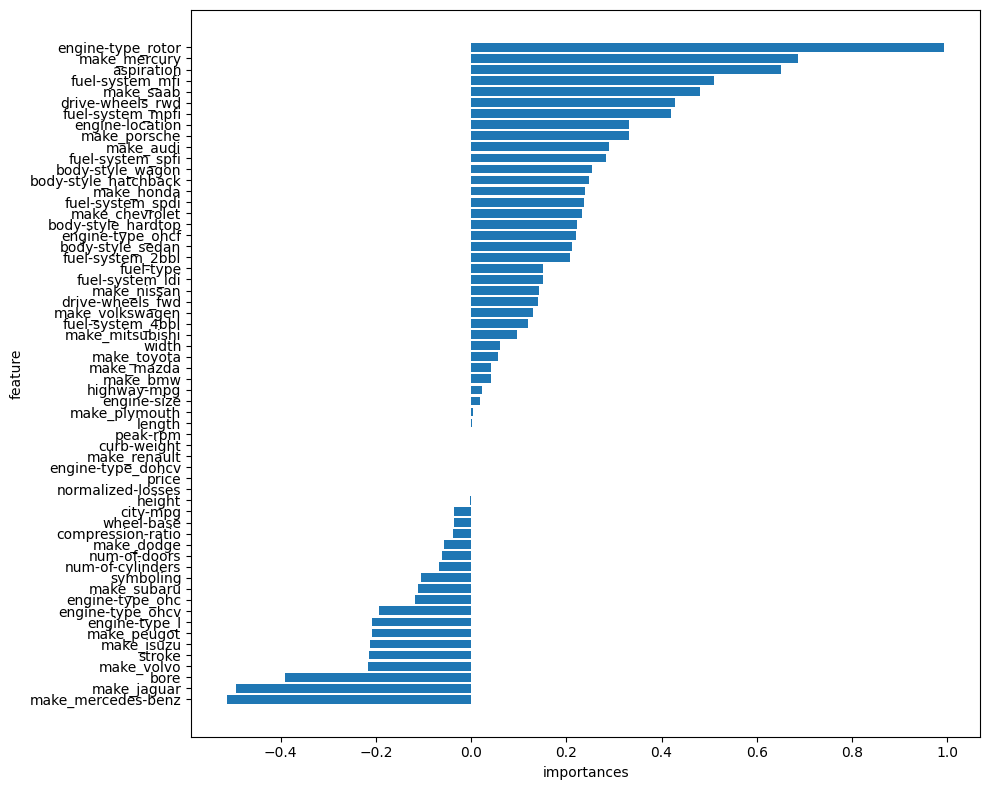

In [42]:
plt.figure(figsize=(10, 8))
importances = pd.DataFrame(lin_reg_c.coef_,
                           index=X_train_encoded.columns,
                           columns=['importance']).sort_values('importance', ascending=False)
importances = importances.sort_values('importance', ascending=True)
plt.barh(range(len(X_train_encoded.columns)), importances['importance'])
plt.yticks(range(len(X_train_encoded.columns)), importances.index)
plt.xlabel("importances")
plt.ylabel("feature")
plt.tight_layout()

### Лучшая модель Lasso (набор с категориальными признаками)

In [43]:
lasso_c = Lasso(**lasso_best_params)
lasso_c.fit(X_train_encoded, y_train_t)

Lasso(alpha=0.020202020202020204)

**Вывод метрик для лучшей модели на обучающем и тестовом наборе**

In [44]:
# Вывод метрик на обучающем и тестовом наборах
print('--------------train-----------')
print('|MAE: |', mae(y_train_t, lasso_c.predict(X_train_encoded)))
print('|MSE: |', mse(y_train_t, lasso_c.predict(X_train_encoded)))
print('|R2:  |', r2(y_train_t, lasso_c.predict(X_train_encoded)))
print('---------------test-----------')
print('|MAE: |', mae(y_test_t, lasso_c.predict(X_test_encoded)))
print('|MSE: |', mse(y_test_t, lasso_c.predict(X_test_encoded)))
print('|R2:  |', r2(y_test_t, lasso_c.predict(X_test_encoded)))
print('------------------------------')

--------------train-----------
|MAE: | 0.18976732506168129
|MSE: | 0.0695809626485101
|R2:  | 0.9247829389416901
---------------test-----------
|MAE: | 0.28761307767146566
|MSE: | 0.29416868278765407
|R2:  | 0.7587582431264834
------------------------------


**Вывод model.coef_ и model.intercept_**

In [45]:
# Вывод коэффициентов и их важности
print('Intercept:', lasso_c.intercept_)
print('Coef:', lasso_c.coef_)

Intercept: 0.047541585146287584
Coef: [-0.00000000e+00 -1.72637790e-04 -0.00000000e+00  3.27468263e-01
 -0.00000000e+00  0.00000000e+00 -3.54075603e-02  2.86880477e-03
  0.00000000e+00 -4.93306537e-03  2.03266912e-04 -1.09532927e-02
  1.25603054e-02  0.00000000e+00 -0.00000000e+00 -1.27006025e-02
  3.71106811e-04 -5.02485441e-02  8.70062272e-03  1.69472379e-05
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.34236641e-01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.

**Построение графика (barh) с важностью коэфициентов при соответствующих признаках**

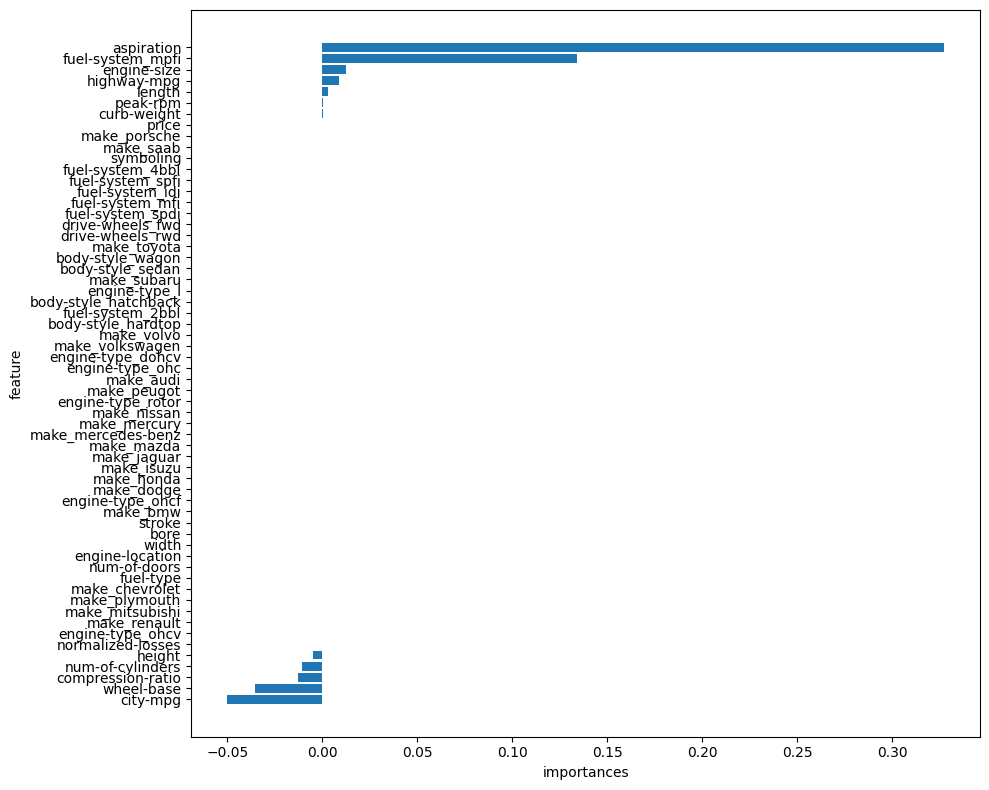

In [46]:
plt.figure(figsize=(10, 8))
importances = pd.DataFrame(lasso_c.coef_,
                           index=X_train_encoded.columns,
                           columns=['importance']).sort_values('importance', ascending=False)
importances = importances.sort_values('importance', ascending=True)
plt.barh(range(len(X_train_encoded.columns)), importances['importance'])
plt.yticks(range(len(X_train_encoded.columns)), importances.index)
plt.xlabel("importances")
plt.ylabel("feature")
plt.tight_layout()

### Лучшая модель Ridge (набор с категориальными признаками)

In [47]:
ridge_c = Ridge(**ridge_best_params)
ridge_c.fit(X_train_encoded, y_train_t)

Ridge()

**Вывод метрик для лучшей модели на обучающем и тестовом наборе**

In [48]:
# Вывод метрик на обучающем и тестовом наборах для модели Ridge
print('--------------train-----------')
print('|MAE: |', mae(y_train_t, ridge_c.predict(X_train_encoded)))
print('|MSE: |', mse(y_train_t, ridge_c.predict(X_train_encoded)))
print('|R2:  |', r2(y_train_t, ridge_c.predict(X_train_encoded)))
print('--------------test------------')
print('|MAE: |', mae(y_test_t, ridge_c.predict(X_test_encoded)))
print('|MSE: |', mse(y_test_t, ridge_c.predict(X_test_encoded)))
print('|R2:  |', r2(y_test_t, ridge_c.predict(X_test_encoded)))
print('------------------------------')

--------------train-----------
|MAE: | 0.12918164378818087
|MSE: | 0.02991024440628481
|R2:  | 0.9676670084152009
--------------test------------
|MAE: | 0.22548571322270533
|MSE: | 0.1772422191170723
|R2:  | 0.8546472590937617
------------------------------


**Вывод model.coef_ и model.intercept_**

In [49]:
# Вывод коэффициентов и их важности
print('Intercept:', ridge_c.intercept_)
print('Coef:', ridge_c.coef_)

Intercept: -3.572597019156123
Coef: [-6.65040641e-02 -2.14126095e-04 -3.08830792e-02  5.93333361e-01
 -4.60841810e-02  2.15221931e-01 -4.19882873e-02  7.03237145e-03
  5.45129330e-02  2.49914935e-03  7.51392968e-05 -1.36628566e-02
  1.50738026e-02 -1.35407159e-01 -5.91880398e-02 -1.92045738e-02
  3.19326853e-04 -5.32675330e-02  2.95968206e-02  4.91004867e-06
  3.69687791e-02  3.77987954e-02  1.97861503e-01 -3.63898018e-02
  2.32516956e-03 -7.65495523e-02 -1.48292960e-01  1.75535101e-02
 -4.11403966e-01  3.66099804e-01  2.52508990e-02  7.60236923e-02
 -1.30815390e-01 -3.20560604e-03  2.15221931e-01  0.00000000e+00
  1.68622857e-01 -7.77993581e-02  7.64624446e-02 -1.83688301e-02
 -1.10667840e-01  1.29903404e-01  1.94626359e-01  1.18094223e-01
  1.42998409e-01  2.01155924e-02  1.91419769e-01 -3.11828273e-02
  5.50160577e-03 -3.08830792e-02  8.51019828e-02  2.10569952e-01
  3.10748726e-02 -3.51673685e-02  0.00000000e+00 -1.30815390e-01
 -1.19067849e-01  1.37422573e-01 -5.53702313e-02  3.25

**Построение графика (barh) с важностью коэфициентов при соответствующих признаках**

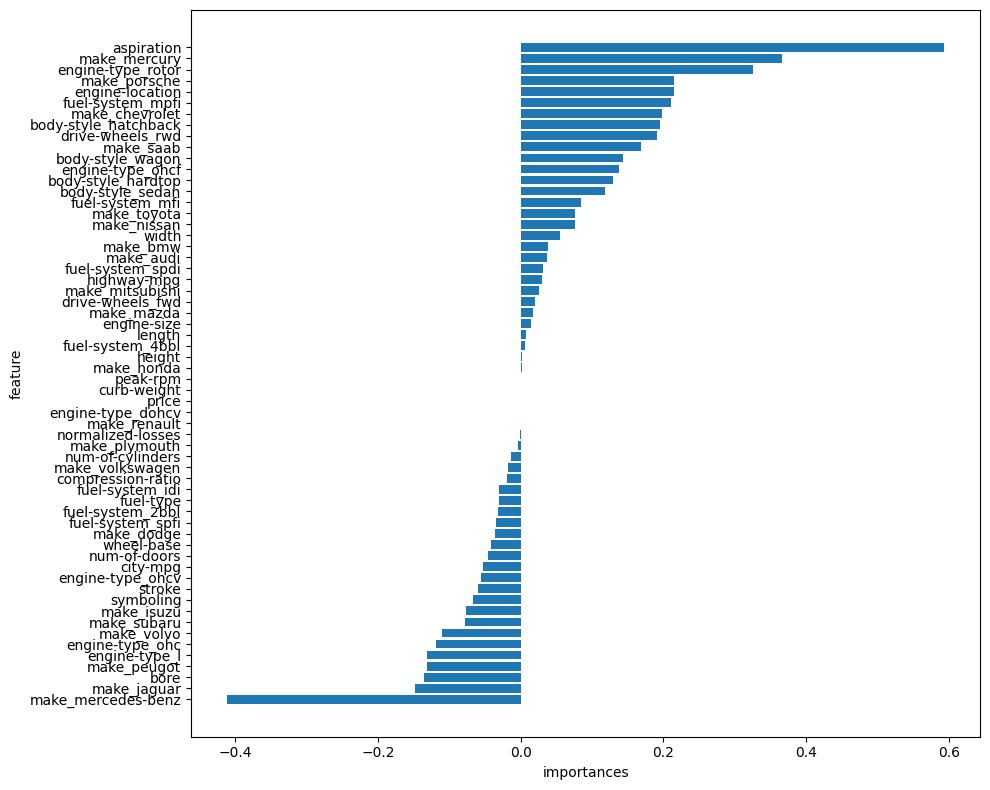

In [50]:
plt.figure(figsize=(10, 8))
importances = pd.DataFrame(ridge_c.coef_,
                           index = X_train_encoded.columns,
                           columns=['importance']).sort_values('importance', ascending=False)

importances = importances.sort_values('importance', ascending=True)
plt.barh(range(len(X_train_encoded.columns)), importances['importance'])
plt.yticks(range(len(X_train_encoded.columns)), importances.index)
plt.xlabel("importances")
plt.ylabel("feature")
plt.tight_layout()

### Лучшая модель ElasticNet (набор с категориальными признаками)

In [51]:
el_net_c = ElasticNet(**elastic_best_params)
el_net_c.fit(X_train_encoded, y_train_t)

ElasticNet(alpha=0.04040404040404041, l1_ratio=0.2828282828282829)

**Вывод метрик для лучшей модели на обучающем и тестовом наборе**

In [52]:
# Вывод метрик на обучающем и тестовом наборах для модели ElasticNet

print('--------------train-----------')
print('|MAE: |', mae(y_train_t, el_net_c.predict(X_train_encoded)))
print('|MSE: |', mse(y_train_t, el_net_c.predict(X_train_encoded)))
print('|R2:  |', r2(y_train_t, el_net_c.predict(X_train_encoded)))
print('--------------test------------')
print('|MAE: |', mae(y_test_t, el_net_c.predict(X_test_encoded)))
print('|MSE: |', mse(y_test_t, el_net_c.predict(X_test_encoded)))
print('|R2:  |', r2(y_test_t, el_net_c.predict(X_test_encoded)))
print('------------------------------')

--------------train-----------
|MAE: | 0.18330840725281827
|MSE: | 0.06403914395539037
|R2:  | 0.9307736481694445
--------------test------------
|MAE: | 0.28467884305166435
|MSE: | 0.28312490910375077
|R2:  | 0.7678150174260833
------------------------------


**Вывод model.coef_ и model.intercept_**

In [53]:
# Вывод коэффициентов и их важности
print('Intercept:', el_net_c.intercept_)
print('Coef:', el_net_c.coef_)

Intercept: -0.4876597351704743
Coef: [-2.00043287e-02 -1.47221026e-04 -0.00000000e+00  3.19866924e-01
 -0.00000000e+00  0.00000000e+00 -4.03903191e-02  3.59430624e-03
  1.47908622e-02 -5.88457564e-03  1.78799011e-04 -3.30221742e-02
  1.25841980e-02  0.00000000e+00 -0.00000000e+00 -1.03736841e-02
  3.66805234e-04 -5.72337760e-02  1.51125193e-02  1.86168057e-05
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -3.11366715e-02  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.40060375e-02 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.47768349e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.62753607e-03 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.51860164e-01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -1.20218506e-02  0.00000000e+00  0.00000000e+00  0.0

**Построение графика (barh) с важностью коэфициентов при соответствующих признаках**

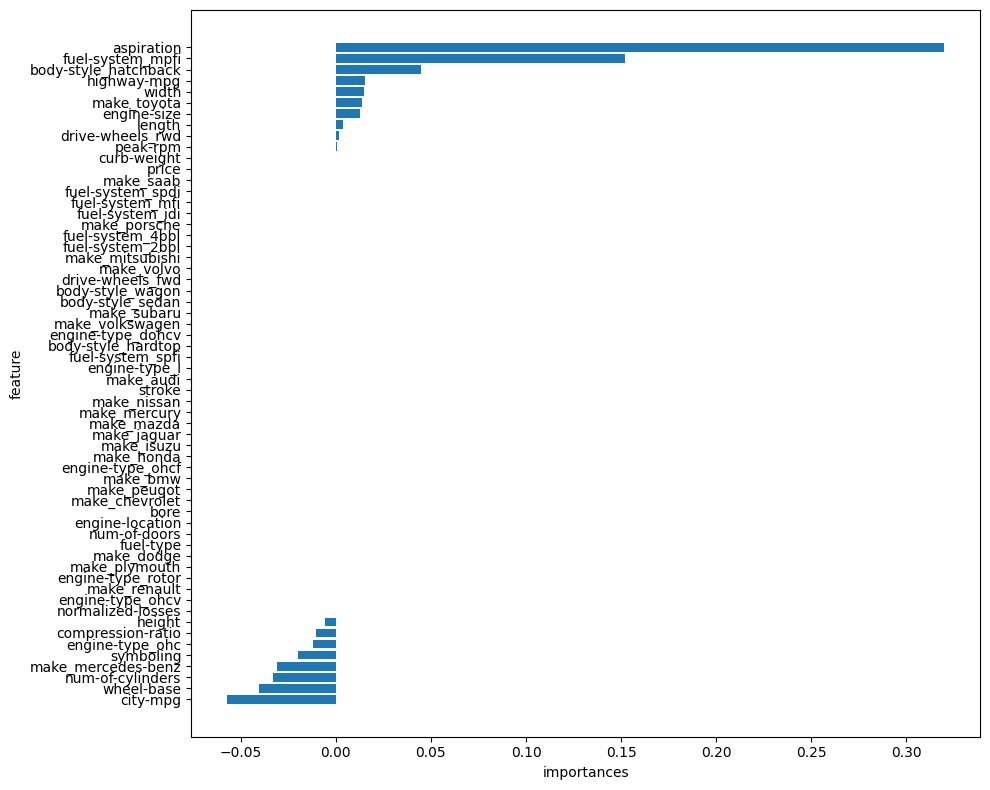

In [54]:
plt.figure(figsize=(10, 8))
importances = pd.DataFrame(el_net_c.coef_,
                           index = X_train_encoded.columns,
                           columns=['importance']).sort_values('importance', ascending=False)

importances = importances.sort_values('importance', ascending=True)
plt.barh(range(len(X_train_encoded.columns)), importances['importance'])
plt.yticks(range(len(X_train_encoded.columns)), importances.index)
plt.xlabel("importances")
plt.ylabel("feature")
plt.tight_layout()

**Вывод всех трех моделей**

In [55]:
# Вывод всех трех моделей
names = {
    lin_reg_c: 'reg',
    lasso_c: 'lasso',
    ridge_c: 'ridge',
    el_net_c: 'elastic'
}
print("{:8s} | {:8s} | {:8s} | {:8s}  | {:8s} ".format('name', 'dataset', 'mae', 'mse', 'r2'))

for mod in [lin_reg_c, lasso_c, ridge_c, el_net_c]:
    print("-" * 53)
    print("{:8s} | {:8s} | {:8.5f} | {:8.5f} | {:8.5f} ".format(
        names[mod],
        'test',
        mae(y_test_t, mod.predict(X_test_encoded)),
        mse(y_test_t, mod.predict(X_test_encoded)),
        r2(y_test_t, mod.predict(X_test_encoded))))
    print("{:8s} | {:8s} | {:8.5f} | {:8.5f} | {:8.5f} ".format(
      names[mod],
        'train',
        mae(y_train_t, mod.predict(X_train_encoded)),
        mse(y_train_t, mod.predict(X_train_encoded)),
        r2(y_train_t, mod.predict(X_train_encoded))))

name     | dataset  | mae      | mse       | r2       
-----------------------------------------------------
reg      | test     |  0.24744 |  0.19258 |  0.84207 
reg      | train    |  0.11665 |  0.02435 |  0.97367 
-----------------------------------------------------
lasso    | test     |  0.28761 |  0.29417 |  0.75876 
lasso    | train    |  0.18977 |  0.06958 |  0.92478 
-----------------------------------------------------
ridge    | test     |  0.22549 |  0.17724 |  0.85465 
ridge    | train    |  0.12918 |  0.02991 |  0.96767 
-----------------------------------------------------
elastic  | test     |  0.28468 |  0.28312 |  0.76782 
elastic  | train    |  0.18331 |  0.06404 |  0.93077 


### Сравнение метрики с наличием категориальных признаков и без для каждой из моделей

**Сравнение моделей Lasso и Lasso с категориальными признаками**

In [56]:
# Сравнение моделей Lasso и Lasso_c по трем метрикам: MAE, MSE и R^2
print("Comparison of Lasso and Lasso_c models:")
print("{:12s} | {:8s} | {:8s} | {:8s}".format('Model', 'MAE', 'MSE', 'R2'))
print("-" * 40)
print("{:12s} | {:8.5f} | {:8.5f} | {:8.5f}".format('Lasso', mae(y_test, lasso.predict(X_test)),
                                                     mse(y_test, lasso.predict(X_test)),
                                                     r2(y_test, lasso.predict(X_test))))
print("{:12s} | {:8.5f} | {:8.5f} | {:8.5f}".format('Lasso_c', mae(y_test_t, lasso_c.predict(X_test_encoded)),
                                                     mse(y_test_t, lasso_c.predict(X_test_encoded)),
                                                     r2(y_test_t, lasso_c.predict(X_test_encoded))))


Comparison of Lasso and Lasso_c models:
Model        | MAE      | MSE      | R2      
----------------------------------------
Lasso        |  0.35196 |  0.34252 |  0.71911
Lasso_c      |  0.28761 |  0.29417 |  0.75876


**Сравнение моделей Linear Regression и Linear Regression с категориальными признаками**

In [57]:
# Сравнение моделей Linear Regression и Linear Regression с категориальными признаками по трем метрикам: MAE, MSE и R^2
print("Comparison of Linear Regression and Linear Regression with categorical features:")
print("{:20s} | {:8s} | {:8s} | {:8s}".format('Model', 'MAE', 'MSE', 'R2'))
print("-" * 45)
print("{:20s} | {:8.5f} | {:8.5f} | {:8.5f}".format('Linear Regression', mae(y_test, lin_reg.predict(X_test)),
                                                     mse(y_test, lin_reg.predict(X_test)),
                                                     r2(y_test, lin_reg.predict(X_test))))
print("{:20s} | {:8.5f} | {:8.5f} | {:8.5f}".format('Linear Regression_c',
                                                     mae(y_test_t, lin_reg_c.predict(X_test_encoded)),
                                                     mse(y_test_t, lin_reg_c.predict(X_test_encoded)),
                                                     r2(y_test_t, lin_reg_c.predict(X_test_encoded))))


Comparison of Linear Regression and Linear Regression with categorical features:
Model                | MAE      | MSE      | R2      
---------------------------------------------
Linear Regression    |  0.33251 |  0.26065 |  0.78625
Linear Regression_c  |  0.24744 |  0.19258 |  0.84207


**Сравнение моделей Ridge Regression и Ridge Regression с категориальными признаками**

In [58]:
# Сравнение моделей Ridge Regression и Ridge Regression с категориальными признаками по трем метрикам: MAE, MSE и R^2
print("Comparison of Ridge Regression and Ridge Regression with categorical features:")
print("{:20s} | {:8s} | {:8s} | {:8s}".format('Model', 'MAE', 'MSE', 'R2'))
print("-" * 45)
print("{:20s} | {:8.5f} | {:8.5f} | {:8.5f}".format('Ridge Regression', mae(y_test, ridge.predict(X_test)),
                                                     mse(y_test, ridge.predict(X_test)),
                                                     r2(y_test, ridge.predict(X_test))))
print("{:20s} | {:8.5f} | {:8.5f} | {:8.5f}".format('Ridge Regression_c',
                                                     mae(y_test_t, ridge_c.predict(X_test_encoded)),
                                                     mse(y_test_t, ridge_c.predict(X_test_encoded)),
                                                     r2(y_test_t, ridge_c.predict(X_test_encoded))))


Comparison of Ridge Regression and Ridge Regression with categorical features:
Model                | MAE      | MSE      | R2      
---------------------------------------------
Ridge Regression     |  0.33189 |  0.27453 |  0.77486
Ridge Regression_c   |  0.22549 |  0.17724 |  0.85465


**Сравнение моделей ElasticNet Regression и ElasticNet Regression с категориальными признакам**

In [59]:
# Сравнение моделей ElasticNet Regression и ElasticNet Regression с категориальными признаками по трем метрикам: MAE, MSE и R^2
print("Comparison of ElasticNet Regression and ElasticNet Regression with categorical features:")
print("{:35s} | {:8s} | {:8s} | {:8s}".format('Model', 'MAE', 'MSE', 'R2'))
print("-" * 55)
print("{:35s} | {:8.5f} | {:8.5f} | {:8.5f}".format('ElasticNet Regression', mae(y_test, el_net.predict(X_test)),
                                                     mse(y_test, el_net.predict(X_test)),
                                                     r2(y_test, el_net.predict(X_test))))
print("{:35s} | {:8.5f} | {:8.5f} | {:8.5f}".format('ElasticNet Regression_c',
                                                     mae(y_test_t, el_net_c.predict(X_test_encoded)),
                                                     mse(y_test_t, el_net_c.predict(X_test_encoded)),
                                                     r2(y_test_t, el_net_c.predict(X_test_encoded))))


Comparison of ElasticNet Regression and ElasticNet Regression with categorical features:
Model                               | MAE      | MSE      | R2      
-------------------------------------------------------
ElasticNet Regression               |  0.34491 |  0.33445 |  0.72573
ElasticNet Regression_c             |  0.28468 |  0.28312 |  0.76782


### Выбор лучшей модели (с категориальными признаками)

In [60]:
# поиск лучшей модели
# Словарь для хранения моделей и их имен
models = {
    'Linear Regression': lin_reg_c,
    'Lasso Regression': lasso_c,
    'Ridge Regression': ridge_c,
    'ElasticNet Regression': el_net_c
}

# Словарь для хранения результатов метрик
results = {}

# Оценка моделей и сохранение результатов
for name, model in models.items():
    y_pred = model.predict(X_test_encoded)
    mae_val = mae(y_test_t, y_pred)
    mse_val = mse(y_test_t, y_pred)
    r2_val = r2(y_test_t, y_pred)
    results[name] = {'MAE': mae_val, 'MSE': mse_val, 'R2': r2_val}

# Поиск лучшей модели по минимальному значению MAE
best_model_name_mae_c = min(results, key=lambda x: results[x]['MAE'])
best_model_metrics_mae_c = results[best_model_name_mae_c]

# Поиск лучшей модели по минимальному значению MSE
best_model_name_mse_c = min(results, key=lambda x: results[x]['MSE'])
best_model_metrics_mse_c = results[best_model_name_mse_c]

# Поиск лучшей модели по максимальному значению R^2
best_model_name_r2_c = max(results, key=lambda x: results[x]['R2'])
best_model_metrics_r2_c = results[best_model_name_r2_c]

# Вывод результатов для MAE
print("Best Model (MAE):", best_model_name_mae_c)
print("MAE:", best_model_metrics_mae_c['MAE'])

# Вывод результатов для MSE
print("Best Model (MSE):", best_model_name_mse_c)
print("MSE:", best_model_metrics_mse_c['MSE'])

# Вывод результатов для R^2
print("Best Model (R2):", best_model_name_r2_c)
print("R2:", best_model_metrics_r2_c['R2'])

print("--------------------------------------------------------------------")
print("--------------------------------|-----------------------------------")
print("--------------------------------|-----------------------------------")
print("--------------------------------|-----------------------------------")
print("--------------------------------|-----------------------------------")
print("--------------------------------|-----------------------------------")
print("--------------------------------|-----------------------------------")
print("--------------------------------|-----------------------------------")
print("--------------------------------ᐁ-----------------------------------")
print("Best of the best model:", best_model_name_r2_c)

Best Model (MAE): Ridge Regression
MAE: 0.22548571322270533
Best Model (MSE): Ridge Regression
MSE: 0.1772422191170723
Best Model (R2): Ridge Regression
R2: 0.8546472590937617
--------------------------------------------------------------------
--------------------------------|-----------------------------------
--------------------------------|-----------------------------------
--------------------------------|-----------------------------------
--------------------------------|-----------------------------------
--------------------------------|-----------------------------------
--------------------------------|-----------------------------------
--------------------------------|-----------------------------------
--------------------------------ᐁ-----------------------------------
Best of the best model: Ridge Regression


**Построение графика (barh) с важностью коэфициентов при соответствующих признаках**

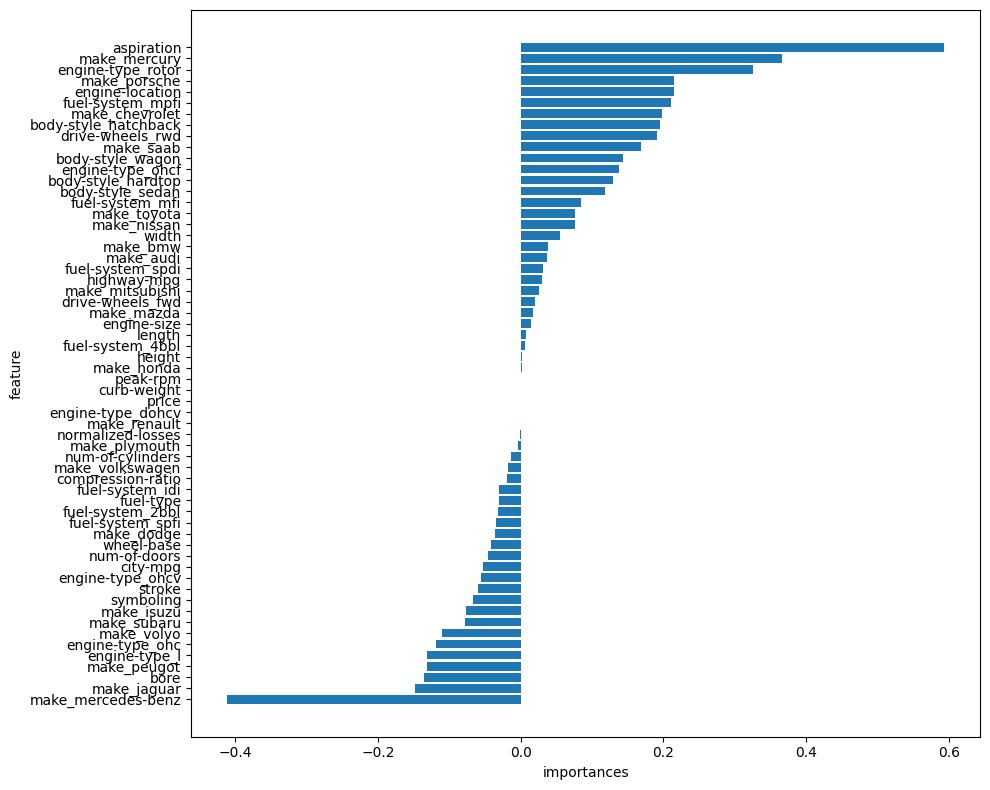

In [61]:
plt.figure(figsize=(10, 8))
importances = pd.DataFrame(ridge_c.coef_,
                           index = X_train_encoded.columns,
                           columns=['importance']).sort_values('importance', ascending=False)

importances = importances.sort_values('importance', ascending=True)
plt.barh(range(len(X_train_encoded.columns)), importances['importance'])
plt.yticks(range(len(X_train_encoded.columns)), importances.index)
plt.xlabel("importances")
plt.ylabel("feature")
plt.tight_layout()

### Выбор лучшей модели

In [62]:
print("Comparison of Linear Regression and Ridge Regression with categorical features:")
print("{:42s} | {:8.5s} | {:9s} | {:8s}".format('Model', 'MAE', 'MSE', 'R2'))
print("-" * 90)
print("{:42s} | {:8.5f} | {:8.5f} | {:8.5f}".format('Linear Regression', mae(y_test, lin_reg.predict(X_test)),
                                                     mse(y_test, lin_reg.predict(X_test)),
                                                     r2(y_test, lin_reg.predict(X_test))))
print("{:42s} | {:8.5f} | {:8.5f} | {:8.5f}".format('Ridge Regression_c',
                                                     mae(y_test_t, ridge_c.predict(X_test_encoded)),
                                                     mse(y_test_t, ridge_c.predict(X_test_encoded)),
                                                     r2(y_test_t, ridge_c.predict(X_test_encoded))))

Comparison of Linear Regression and Ridge Regression with categorical features:
Model                                      | MAE      | MSE       | R2      
------------------------------------------------------------------------------------------
Linear Regression                          |  0.33251 |  0.26065 |  0.78625
Ridge Regression_c                         |  0.22549 |  0.17724 |  0.85465


**Построение графика (barh) с важностью коэфициентов при соответствующих признаках**

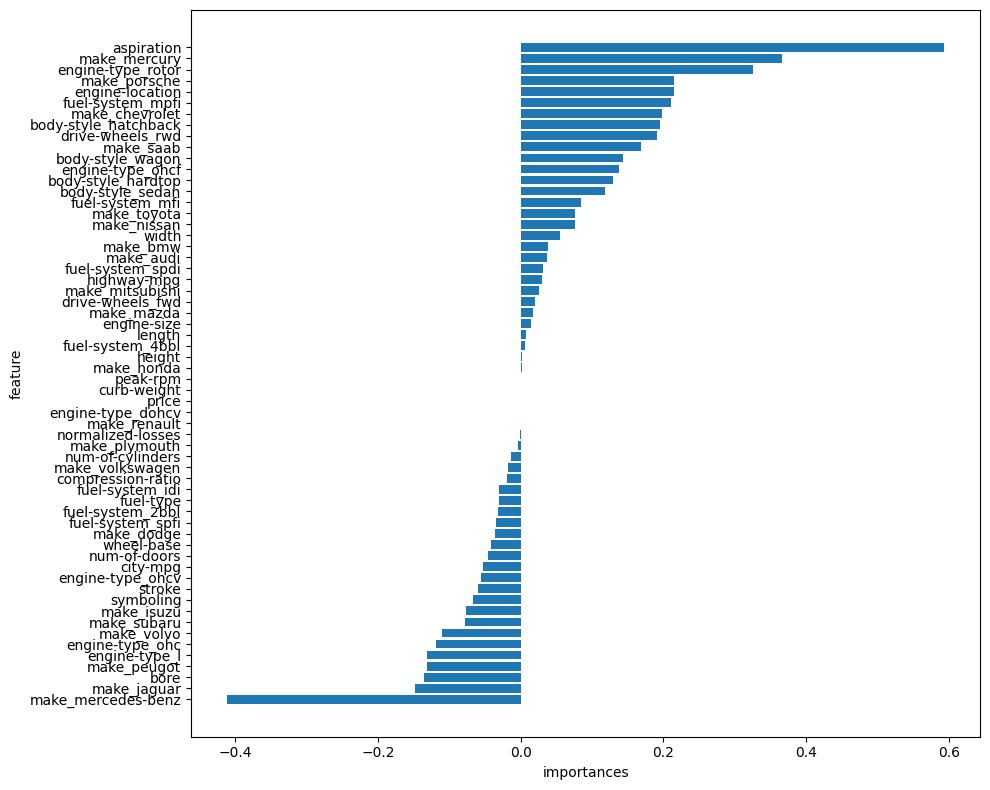

In [63]:
plt.figure(figsize=(10, 8))
importances = pd.DataFrame(ridge_c.coef_,
                           index = X_train_encoded.columns,
                           columns=['importance']).sort_values('importance', ascending=False)

importances = importances.sort_values('importance', ascending=True)
plt.barh(range(len(X_train_encoded.columns)), importances['importance'])
plt.yticks(range(len(X_train_encoded.columns)), importances.index)
plt.xlabel("importances")
plt.ylabel("feature")
plt.tight_layout()

### Осуществление фильтрацию признаков с использованием Recursive Feature Elimination

#### Для Ridge Regression with categorical features

**Поиск оптимального количества признаков**

In [64]:
bts = ridge_c
rfe = RFE(estimator=bts)
param_grid = {
    'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
}

grid_search = GridSearchCV(estimator=rfe, param_grid=param_grid, cv=5)

# Выполнение поиска по сетке
grid_search.fit(X_train_encoded, y_train_t)

# Вывод результатов
print("Лучшее количество признаков:", grid_search.best_params_['n_features_to_select'])

Лучшее количество признаков: 55


In [65]:
selector = RFE(bts, n_features_to_select=55)

# Обучение RFE на обучающих данных
selector.fit(X_train_encoded, y_train_t)

RFE(estimator=Ridge(), n_features_to_select=55)

**Построение графика важности отобранных признаков после фильтрации**

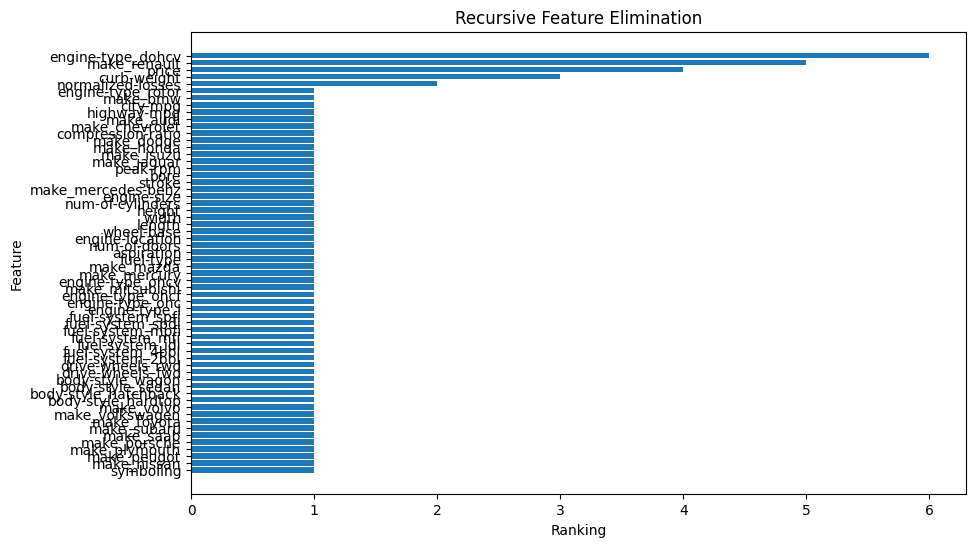

In [66]:
# Построение графика важности отобранных признаков после фильтрации
plt.figure(figsize=(10, 6))
importances = pd.DataFrame({'feature': X_train_encoded.columns, 'importance': selector.ranking_}).sort_values('importance', ascending=True)
plt.barh(importances['feature'], importances['importance'])
plt.xlabel("Ranking")
plt.ylabel("Feature")
plt.title("Recursive Feature Elimination")
plt.show()


**Оценка модели на тестовом наборе после фильтрации признаков**

In [67]:
# Оценка модели на тестовом наборе после фильтрации признаков
X_train_selected = selector.transform(X_train_encoded)
X_test_selected = selector.transform(X_test_encoded)
bts.fit(X_train_selected, y_train_t)
y_pred = bts.predict(X_test_selected)

**Вывод метрик для лучшей модели после фильтрации признаков**

In [68]:
# Вывод метрик для лучшей модели после фильтрации признаков
print('Best Model after feature selection:')
print('------------test--------------')
print('|MAE: |', mae(y_test_t, y_pred))
print('|MSE: |', mse(y_test_t, y_pred))
print('|R2:  |', r2(y_test_t, y_pred))
print('------------------------------')

Best Model after feature selection:
------------test--------------
|MAE: | 0.2317465736793438
|MSE: | 0.17041792984685816
|R2:  | 0.860243719999656
------------------------------


#### Для Linear Regression

**Поиск оптимального количества признаков**

In [69]:
rfe2 = RFE(estimator=lin_reg)
param_grid = {
    'n_features_to_select': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
}

grid_search2 = GridSearchCV(estimator=rfe2, param_grid=param_grid, cv=5)

# Выполнение поиска по сетке
grid_search2.fit(X_train, y_train)

# Вывод результатов
print("Лучшее количество признаков:", grid_search2.best_params_['n_features_to_select'])

Лучшее количество признаков: 10


In [70]:
selector2 = RFE(lin_reg, n_features_to_select=10)

# Обучение RFE на обучающих данных
selector2.fit(X_train, y_train)

RFE(estimator=LinearRegression(n_jobs=-1), n_features_to_select=10)

**Построение графика важности отобранных признаков после фильтрации**

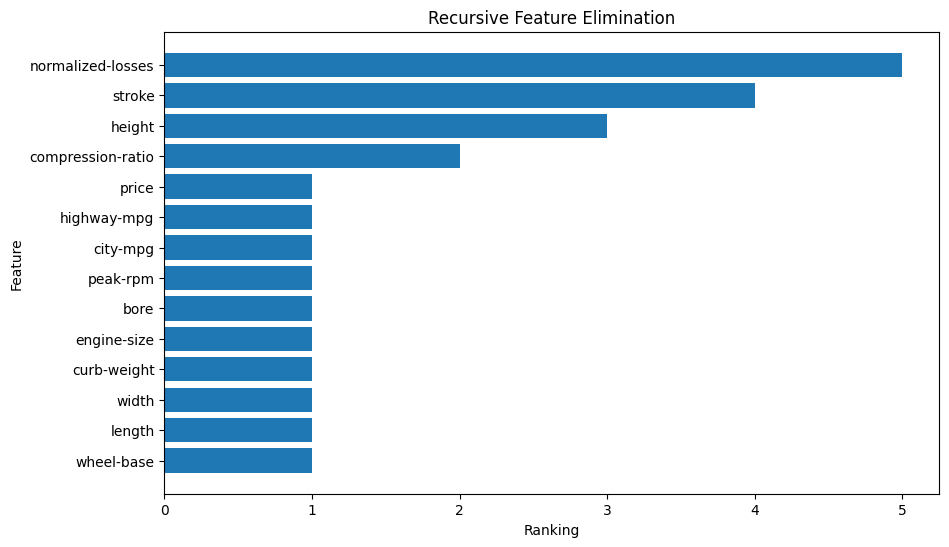

In [71]:
# Построение графика важности отобранных признаков после фильтрации
plt.figure(figsize=(10, 6))
importances = pd.DataFrame({'feature': X_train.columns, 'importance': selector2.ranking_}).sort_values('importance', ascending=True)
plt.barh(importances['feature'], importances['importance'])
plt.xlabel("Ranking")
plt.ylabel("Feature")
plt.title("Recursive Feature Elimination")
plt.show()

**Оценка модели на тестовом наборе после фильтрации признаков**

In [72]:
# Оценка модели на тестовом наборе после фильтрации признаков
X_train_selec = selector2.transform(X_train)
X_test_selec = selector2.transform(X_test)
best_model.fit(X_train_selec, y_train)
y_pred1 = best_model.predict(X_test_selec)

**Вывод метрик для лучшей модели после фильтрации признаков**

In [73]:
# Вывод метрик для лучшей модели после фильтрации признаков
print('Best Model after feature selection:')
print('------------test--------------')
print('|MAE: |', mae(y_test, y_pred1))
print('|MSE: |', mse(y_test, y_pred1))
print('|R2:  |', r2(y_test, y_pred1))
print('------------------------------')

Best Model after feature selection:
------------test--------------
|MAE: | 0.33097253723080977
|MSE: | 0.2569913029650163
|R2:  | 0.7892466565747677
------------------------------


## Задание 7.

### Лучший регрессор, обученный на данных без категориальных признаков (значения метрик на тестовом наборе)

Linear Regression:

In [74]:
# Вывод метрик для лучшей модели на тестовом наборе
print('-------------test-------------')
print('|MAE: |', mae(y_test, best_model.predict(X_test_selec)))
print('|MSE: |', mse(y_test, best_model.predict(X_test_selec)))
print('|R2:  |', r2(y_test, best_model.predict(X_test_selec)))
print('------------------------------')

-------------test-------------
|MAE: | 0.33097253723080977
|MSE: | 0.2569913029650163
|R2:  | 0.7892466565747677
------------------------------


### Лучший регрессор, обученный на данных с категориальными признаками (значения метрик на тестовом наборе).

Ridge Regression:

In [75]:
# Вывод метрик для лучшей модели на тестовом наборе
print('-------------test-------------')
print('|MAE: |', mae(y_test_t, bts.predict(X_test_selected)))
print('|MSE: |', mse(y_test_t, bts.predict(X_test_selected)))
print('|R2:  |', r2(y_test_t, bts.predict(X_test_selected)))
print('------------------------------')

-------------test-------------
|MAE: | 0.2317465736793438
|MSE: | 0.17041792984685816
|R2:  | 0.860243719999656
------------------------------


### Вывод о результатах использования Recursive Feature Elimination (лучше или хуже - значения метрик).

**Linear Regression**

*До RFE:*
* MAE: 0.3325
* MSE: 0.2606
* R2: 0.7862


*После RFE (с 10 признаками из 14):*
* MAE: 0.3309
* MSE: 0.2569
* R2: 0.7892


MAE: Немного уменьшился.

MSE: Немного уменьшился.

R2: Незначительно увеличился.

В случае линейной регрессии результаты до и после RFE очень похожи. Легкое улучшение MSE и R2 говорит о том, что уменьшение числа признаков с 14 до 10 немного помогло модели стать более точной, хотя изменения незначительные. Таким образом, RFE не сильно повлияло на производительность модели.

**Ridge Regression с категориальными признаками**

*До RFE:*
* MAE: 0.2255
* MSE: 0.1772
* R2: 0.8546


*После RFE (с 56 признаками из 60):*
* MAE: 0.2317
* MSE: 0.1704
* R2: 0.8602


MAE: Немного увеличился после RFE.

MSE: Заметно уменьшился.

R2: Увеличился.

В случае Ridge Regression метрики производительности на тестовом наборе улучшились после применения RFE, за исключением MAE, который немного увеличился. Однако MSE заметно уменьшился, а R2 увеличился, что говорит о том, что отбор признаков значительно улучшил качество модели, убрав избыточные или нерелевантные признаки и улучшив ее обобщающую способность.

**Вывод**

Использование метода Recursive Feature Elimination (RFE) дало разные результаты для двух моделей:

1) Linear Regression: Метрики производительности незначительно улучшились, что указывает на то, что большинство признаков были полезными, и их удаление или сохранение не сильно повлияло на модель.

2) Ridge Regression: MSE и R2 улучшились, несмотря на небольшое увеличение MAE.
RFE помогло улучшить модель, убрав избыточные признаки и увеличив ее обобщающую способность.

      Метод RFE может быть более полезен для более сложных моделей, таких как Ridge Regression, особенно в случаях с большим количеством признаков. Для более простых моделей, таких как Linear Regression, эффект от использования RFE может быть менее заметным, хотя и положительным.






